# Index <a class="anchor" id="08.i"></a>

* [Exercise 1](#08.1)
* [Exercise 2](#08.2)
* [Exercise 3](#08.3)
* [Exercise 4](#08.4)
* [Exercise 5](#08.5)

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

## Exercise 1 <a class="anchor" id="08.1"></a>
* [Index](#08.i)

In [1]:
import numpy as np
import random
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def prob_1(t,tau):
    return 1 - 2.0**(-t/tau)

In [3]:
N = 1000
tau = 3.052*60
ts = np.arange(0,3.052*60*5,1)

th = np.ones(N)
pb = np.zeros(N)

n_th = []
n_pb = []

for t in ts:
    for i in range(N):
        # Each atom as the same probability of decaying after each step of 1s
        if random.uniform(0, 1) < prob_1(1,tau):
            th[i] = 0
            pb[i] = 1
    
    n_th.append(np.sum(th))
    n_pb.append(np.sum(pb))

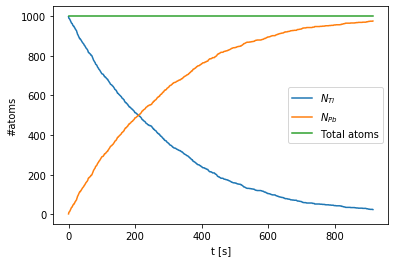

In [4]:
plt.plot(ts, n_th, label="$N_{Tl}$")
plt.plot(ts, n_pb, label="$N_{Pb}$")
plt.plot(ts, np.array(n_pb)+np.array(n_th), label="Total atoms")
plt.xlabel('t [s]')
plt.ylabel('#atoms')
plt.legend()
plt.show()

In [5]:
def prob_2(t,tau):
    return 2.0**(-t/tau) * np.log(2.0) / tau

def expon_icdf(p, tau):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return - np.log(1-p) * tau / np.log(2.0)

In [6]:
ts = np.zeros(N)

for i in range(N):
    p = random.uniform(0, 1)
    ts[i] = expon_icdf(p,tau)

In [7]:
ts = np.sort(ts)

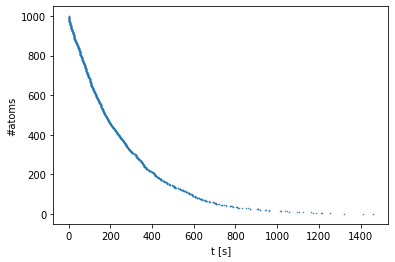

In [8]:
plt.plot(ts, range(999,-1,-1), 'o', markersize=0.5)
plt.xlabel('t [s]')
plt.ylabel('#atoms')
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

## Exercise 2 <a class="anchor" id="08.2"></a>
* [Index](#08.i)

In [9]:
import numpy as np
import random
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
N = 1000000
a_0 = 52.9e3  # fm

xs = np.random.normal(loc=0.0, scale=a_0/100.0, size=(N))
ys = np.random.normal(loc=0.0, scale=a_0/100.0, size=(N))

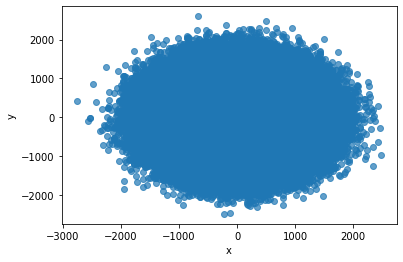

In [11]:
plt.scatter(xs, ys, alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
e2 = 1.44 * 2.0 # MeV*fm
def theta(x,y, Z=79, E=7.7):
    b = np.sqrt(x*x + y*y)
    f = (Z*e2) / (E*b)
    return 2 * np.arctan(f)

In [13]:
thetas = theta(xs, ys)

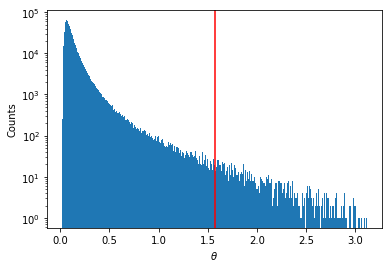

In [14]:
plt.hist(thetas, bins=500)
plt.yscale('log')
plt.axvline(np.pi/2.0, color='red')
plt.xlabel(r'$\theta$')
plt.ylabel('Counts')
plt.show()

In [15]:
thetas_bounced = thetas[(thetas >= np.pi/2.0)]
print(thetas_bounced.shape[0])

1614


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

## Exercise 3 <a class="anchor" id="08.3"></a>
* [Index](#08.i)

In [16]:
import numpy as np
import random
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

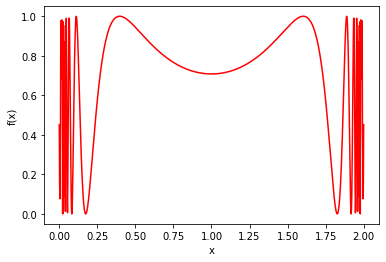

In [17]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,f(x),'r-')
plt.show()

In [18]:
def I_hit_miss(N):
    x=np.random.uniform(0.0, 2.0, size=N)
    y=np.random.uniform(0.0, 1.0, size=N)
    hit = y[y<f(x)]
    k = hit.shape[0]
    I=2.0 * k/N
    return I

In [19]:
Ns = []
Is = []
for N in [10**i for i in range(3,9)]:
    Ns.append(N)
    Is.append(I_hit_miss(N))

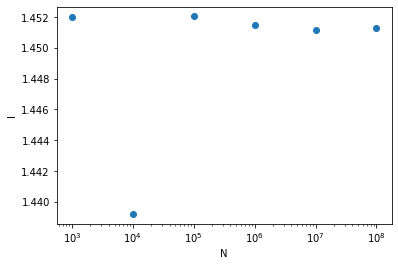

In [20]:
plt.plot(Ns,Is,'o')
plt.xlabel('N')
plt.ylabel('I')
plt.xscale('log')
plt.show()

In [21]:
Is = []
N = 100000
for i in range(1000):
    Is.append(I_hit_miss(N))
Is = np.array(Is)
err_I_hm = np.std(Is)

In [22]:
print(err_I_hm)

0.0026730124063311035


In [23]:
def I_mean_value(N):
    x=np.random.uniform(0.0, 2.0, size=N)
    y = f(x)
    std_y = np.std(y)
    err = 2 * std_y / np.sqrt(N)
    return 2.0*np.mean(y), err

In [24]:
I_hm = I_hit_miss(N)
I_mv, err_I_mv = I_mean_value(N)
print("Integral computed with hit or miss   :", I_hm)
print("Error for I computed with hit or miss:", err_I_hm)
print("Integral computed with mean value    :", I_mv)
print("Error for I computed with mean value :", err_I_mv)

Integral computed with hit or miss   : 1.44922
Error for I computed with hit or miss: 0.0026730124063311035
Integral computed with mean value    : 1.4501590443904309
Error for I computed with mean value : 0.0016666401874589633


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



## Exercise 4 <a class="anchor" id="08.4"></a>
* [Index](#08.i)

In [25]:
import numpy as np
import random
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def f(x):
    x2 = np.sum(x**2)
    if x2 <= 1:
        return 1
    else:
        return 0
        

def I_sphere(N,dim):
    xs = np.random.uniform(-1.0, 1.0, size=(N,dim))
    fs = np.zeros(N)
    for i in range(N):
        fs[i] = f(xs[i])
    V = (2.0**dim)*np.mean(fs)
    return V

In [27]:
V_2  = I_sphere(1000000,2 )
V_10 = I_sphere(1000000,10)

print(" 2-D: V=", V_2 )
print("10-D: V=", V_10)

 2-D: V= 3.141732
10-D: V= 2.581504


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

## Exercise 5 <a class="anchor" id="08.5"></a>
* [Index](#08.i)

In [28]:
import numpy as np
import random
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
def w(x):
    return 1.0 / np.sqrt(x)

def inv_tr_w(x):
    return x*x / 4.0

def I_w(a, b):
    return 2.0 * (np.sqrt(b) - np.sqrt(a))

def f(x):
    return x**(-0.5) / (np.exp(x) + 1)

def I_imp_samp(N, a, b):
    xs = np.random.uniform(a, b, size=N)
    ws = inv_tr_w(x)
    frac = f(ws) / w(ws)
    return np.mean(frac) * 2.0 #I_w(a,b)

In [30]:
N = 1000000
I = I_imp_samp(N,0,1.0)
print(I)

0.8389329927820404
